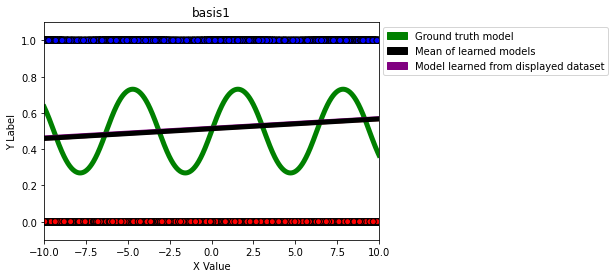

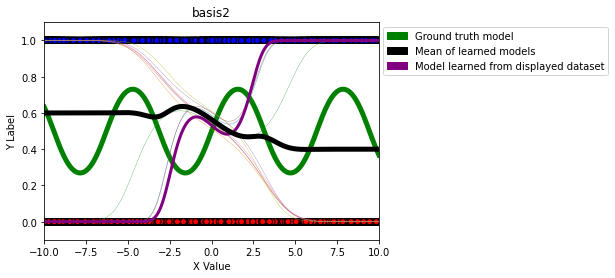

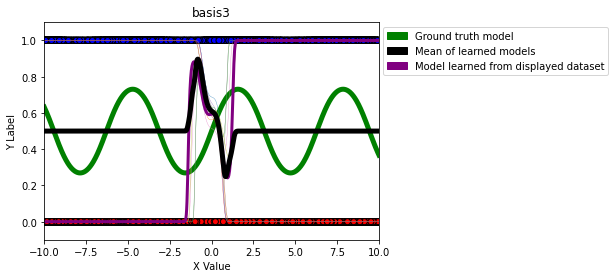

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.patches as mpatches
from scipy.special import expit as sigmoid

# This script requires the above packages to be installed.
# Please implement the basis2, basis3, fit, and predict methods.
# Then, create the three plots. An example has been included below, although
# the models will look funny until fit() and predict() are implemented!

# You can add additional private methods by beginning them with two
# underscores. It may look like the __dummyPrivateMethod below. You can feel
# free to change any of the class attributes, as long as you do not change any
# of the given function headers (they must take and return the same arguments).

# Note: this is in Python 3

def basis1(x):
    return np.stack([np.ones(len(x)), x], axis=1)

# TODO: Implement this
def basis2(x):
    return np.stack([np.ones(len(x)), x,x**2,x**3], axis=1)

# TODO: Implement this
def basis3(x):
    return np.stack([np.ones(len(x)), x,x**2,x**3,x**4,x**5], axis=1)

class LogisticRegressor:
    def __init__(self, eta, runs):
        # Your code here: initialize other variables here
        self.eta = eta
        self.runs = runs

    # NOTE: Just to show how to make 'private' methods
    def __dummyPrivateMethod(self, input):
        return None
    
    

    # TODO: Optimize w using gradient descent
    def fit(self, x, y, w_init=None):
        # Keep this if case for the autograder
        if w_init is not None:
            self.W = w_init
        else:
            self.W = np.random.rand(x.shape[1], 1)
        
        nrows=x.shape[0]
        #print("nrows:",nrows)
        
        
        for irun in range(self.runs):
            sum_error=0
           
            yhat=self.predict(x)
            gradient=np.dot(x.T,(yhat-y))/y.shape[0]
            #print("gradientshape:",gradient)
            #print("Wshape:",self.W.shape)
            #print("yhat:",yhat.shape,"y:",y[irow,:],"xrow",x[irow,:].T.shape)
            #deltaW=self.eta*x[irow,:]*(y[irow,:]-yhat)
            #print("deltaW:",deltaW)
            #deltaW.shape=self.W.shape
            #print("deltaW:",deltaW)
            self.W-=self.eta*gradient

                #print("Wshape:",self.W.shape)
            #print("irun:",irun,"error:",sum_error)
                
            
        

    # TODO: Fix this method!
    def predict(self, x):
        return sigmoid(np.dot(x, self.W))

# Function to visualize prediction lines
# Takes as input last_x, last_y, [list of models], basis function, title
# last_x and last_y should specifically be the dataset that the last model
# in [list of models] was trained on
def visualize_prediction_lines(last_x, last_y, models, basis, title):
    # Plot setup
    green = mpatches.Patch(color='green', label='Ground truth model')
    black = mpatches.Patch(color='black', label='Mean of learned models')
    purple = mpatches.Patch(color='purple', label='Model learned from displayed dataset')
    plt.legend(handles=[green, black, purple], loc='upper right', bbox_to_anchor=(1.7, 1))
    plt.title(title)
    plt.xlabel('X Value')
    plt.ylabel('Y Label')
    plt.axis([-10, 10, -.1, 1.1]) # Plot ranges

    # Plot dataset that last model in models (models[-1]) was trained on
    cmap = c.ListedColormap(['r', 'b'])
    plt.scatter(last_x, last_y, c=last_y, cmap=cmap, linewidths=1, edgecolors='black')

    # Plot models
    X_pred = np.linspace(-10, 10, 1000)
    X_pred_transformed = basis(X_pred)

    ## Ground truth model
    plt.plot(X_pred, sigmoid(np.sin(X_pred)), 'g', linewidth=5)

    ## Individual learned logistic regressor models
    Y_hats = []
    for i in range(len(models)):
        model = models[i]
        Y_hat = model.predict(X_pred_transformed)
        Y_hats.append(Y_hat)
        if i < len(models) - 1:
            plt.plot(X_pred, Y_hat, linewidth=.3)
        else:
            plt.plot(X_pred, Y_hat, 'purple', linewidth=3)

    # Mean / expectation of learned models over all datasets
    plt.plot(X_pred, np.mean(Y_hats, axis=0), 'k', linewidth=5)

    plt.savefig(title + '.png')
    plt.show()

# Function to generate datasets from underlying distribution
def generate_data(dataset_size):
    x, y = [], []
    for _ in range(dataset_size):
        x_i = 20 * np.random.random() - 10
        p_i = sigmoid(np.sin(x_i))
        y_i = np.random.binomial(1, p_i)
        x.append(x_i)
        y.append(y_i)
    return np.array(x), np.array(y).reshape(-1, 1)

if __name__ == "__main__":
    eta = 0.001
    runs = 10000
    N = 100000

    # TODO: Make plot for each basis with all 10 models on each plot

    # For example:
    basename='basis1'
    all_models = []
    for _ in range(10):
        x, y = generate_data(N)
        x_transformed = basis1(x)
        model = LogisticRegressor(eta=eta, runs=runs)
        model.fit(x_transformed, y)
        all_models.append(model)
        
    # Here x and y contain last dataset:
    visualize_prediction_lines(x, y, all_models, basis1, basename)
    
    basename='basis2'
    all_models = []
    for _ in range(10):
        x, y = generate_data(N)
        x_transformed = basis2(x)
        model = LogisticRegressor(eta=eta, runs=runs)
        model.fit(x_transformed, y)
        all_models.append(model)
        
    # Here x and y contain last dataset:
    visualize_prediction_lines(x, y, all_models, basis2, basename)
    
    basename='basis3'
    all_models = []
    for _ in range(10):
        x, y = generate_data(N)
        x_transformed = basis3(x)
        model = LogisticRegressor(eta=eta, runs=runs)
        model.fit(x_transformed, y)
        all_models.append(model)

    # Here x and y contain last dataset:
    visualize_prediction_lines(x, y, all_models, basis3, basename)
    

In [43]:
x

array([-7.04194393, -3.90550499,  1.85634073,  6.03420352,  5.57900029,
        2.82825663, -0.69942956, -0.88734732, -9.82251452,  1.06898358,
        4.05082571, -0.9070664 ,  8.17636251,  7.75457225, -6.51665465,
        5.02190137,  5.96963167,  8.98701155, -3.29166829,  5.71591513,
       -5.20321982,  9.38743806, -9.03390516,  7.28744576,  0.40279893,
       -9.76728825,  1.39766658, -9.8476769 , -4.1457473 , -0.79880137])

In [7]:
y.shape

(10, 1)

In [4]:
np.dot(x,5)

array([-21.62548393, -40.36846747, -31.29148255,  43.00253861,
       -34.16140795,   8.21884518,   2.93257545,  -2.92256049,
         0.67350333,  19.41774933])

In [6]:
a=np.random.rand(10,1)
b=np.random.rand(1,10)
a+b

array([[0.90219787, 0.85472243, 1.56251249, 1.39546652, 1.53290725,
        1.32157113, 1.09155679, 1.51443368, 1.53386055, 1.333835  ],
       [0.66504333, 0.61756789, 1.32535795, 1.15831198, 1.29575271,
        1.08441659, 0.85440225, 1.27727914, 1.29670601, 1.09668045],
       [1.14247832, 1.09500288, 1.80279293, 1.63574697, 1.7731877 ,
        1.56185158, 1.33183724, 1.75471413, 1.774141  , 1.57411544],
       [1.24812618, 1.20065074, 1.9084408 , 1.74139483, 1.87883556,
        1.66749944, 1.4374851 , 1.86036199, 1.87978886, 1.67976331],
       [0.49816593, 0.4506905 , 1.15848055, 0.99143459, 1.12887532,
        0.91753919, 0.68752485, 1.11040175, 1.12982862, 0.92980306],
       [0.7242757 , 0.67680026, 1.38459032, 1.21754436, 1.35498508,
        1.14364896, 0.91363462, 1.33651152, 1.35593838, 1.15591283],
       [0.41905266, 0.37157722, 1.07936728, 0.91232131, 1.04976204,
        0.83842592, 0.60841158, 1.03128847, 1.05071534, 0.85068979],
       [0.49959923, 0.4521238 , 1.1599138